<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Explanatory data analysis

In [10]:
boston_df.set_index('Unnamed: 0', inplace= True)
boston_df.index.name = 'index'
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
index,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0


In [11]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [12]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Descriptive Statistics and visualizations

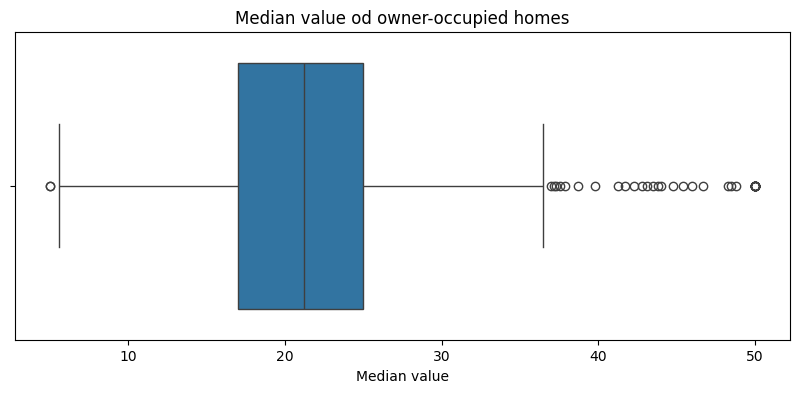

In [13]:
#For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(10,4))
sns.boxplot(boston_df, x ='MEDV')
pyplot.title('Median value od owner-occupied homes')
pyplot.xlabel('Median value')
pyplot.show()

R/ Majority of outliers after third quartile.

<Figure size 1000x400 with 0 Axes>

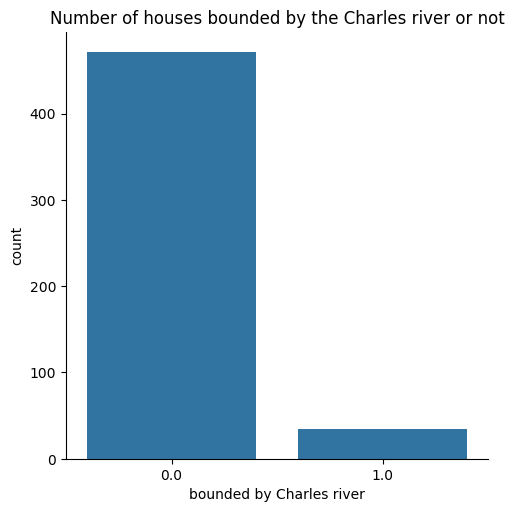

In [14]:
#Provide a  bar plot for the Charles river variable
pyplot.figure(figsize=(10,4))
ax=sns.catplot(x=boston_df['CHAS'], kind ='count')
pyplot.title('Number of houses bounded by the Charles river or not')
pyplot.xlabel('bounded by Charles river')
pyplot.show()

In [15]:
boston_df.CHAS.value_counts(normalize =True)

0.0    0.93083
1.0    0.06917
Name: CHAS, dtype: float64

R/ houses not bounded by Charles River 

In [16]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into 
#three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE']<70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

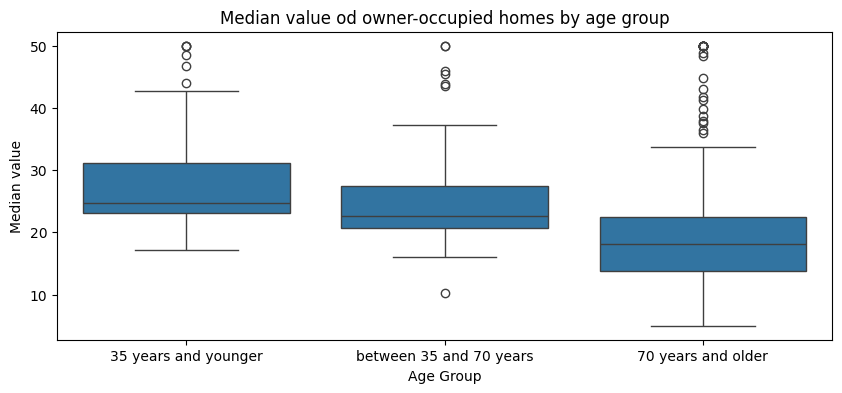

In [18]:
pyplot.figure(figsize=(10,4))
sns.boxplot(boston_df, x= 'age_group', y='MEDV', order=['35 years and younger','between 35 and 70 years','70 years and older'])
pyplot.title('Median value od owner-occupied homes by age group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median value')
pyplot.show()

R/ Median values od owner-occupied is inversely proportional to the age of its occupants

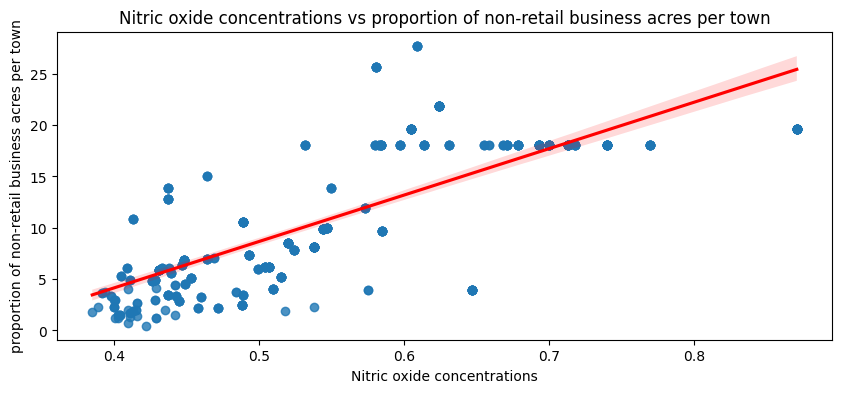

In [19]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the 
#proportion of non-retail business acres per town. What can you say about the relationship?
pyplot.figure(figsize=(10,4))
sns.regplot(boston_df, x='NOX', y='INDUS', line_kws=dict(color='red'))
pyplot.title('Nitric oxide concentrations vs proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('proportion of non-retail business acres per town')
pyplot.show()

R/ There seem a lineal relation between INDUS and NOX until NOX = 0,6.

In [20]:
#Create a histogram for the pupil to teacher ratio variable

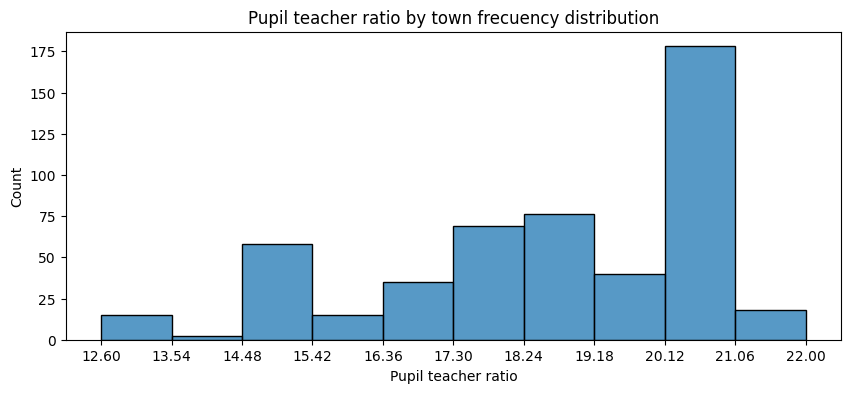

In [33]:
import numpy as np
count, bin_edges = np.histogram(boston_df['PTRATIO'])
pyplot.figure(figsize=(10,4))
sns.histplot(boston_df['PTRATIO'], bins = 10)
pyplot.xlabel('Pupil teacher ratio')
pyplot.xticks(bin_edges)
pyplot.title('Pupil teacher ratio by town frecuency distribution')
pyplot.show()

R/ Pupil teacher ratio is higher at 20-21 range.

In [22]:
#Is there a significant difference in median
#value of houses bounded by the Charles river or not? (T-test for independent samples)


t test :  
scipy.stats.ttest_ind(a,b,equal_var=True) 

In [23]:
a = boston_df[boston_df['CHAS']==0]['MEDV']
b = boston_df[boston_df['CHAS']==1]['MEDV']
alpha = 0.05

In [24]:
scipy.stats.levene(a,b, center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

R/ Since p_value is lower than alpha we can not assume equality of variance.

In [34]:
scipy.stats.ttest_ind(a,b,equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

R/ Since p-value is lower that alpha we reject null hypothesis. There is statistical difference between median value of houses bounded or not by Charles River.

In [26]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


Hypothesis test
- $H_0: U1=U2=U3 $

- $H_1:$ At least one of the mean differ



ANOVA one way :
scipy.stats.f_oneway()

In [28]:
boston_df.columns
low = boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
mid = boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
high = boston_df[boston_df['age_group']=='70 years and older']['MEDV']

F_stats,p_value = scipy.stats.f_oneway(low,mid,high)
print('F statistics= {0}, p-value = {1}'.format(F_stats, p_value))


F statistics= 36.40764999196599, p-value = 1.7105011022702984e-15


R/ Since p-value is lower than alpha, we reject null hypotesis. There is at least one mean that differ.

In [29]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


Hypothesis test

- $H_0:$ NOX and INDUS are not correlationated
- $H_1:$ NOX is correlated with INDUS 

In [30]:
pearson,p_value = scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print('Pearson statistic = {0}, p_value = {1}'.format(pearson, p_value))

Pearson statistic = 0.7636514469209192, p_value = 7.913361061210442e-98


R/ Since the p-value is lower than alpha, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

In [31]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


 Hypothesis test
 
-$H_0:$ weighted distances to five Boston employment centres are not related to homes median value

-$H_1:$ Hypothesis: weighted distances to five Boston employment centres are related to homes median value

In [32]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predict = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        16:14:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Coef correlation: sqrt(R2) = 0,248

The square root of R-squared is 0.248, implies a weak correlation between DIS and MEDV.
We reject the null hypothesis p_value equal to 0.